## The Class Size Paradox

In [1]:
import Pmf
import myplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
classes = [(5, 9, 8),
           (10, 14, 8),
           (15, 19, 14),
           (20, 24, 4),
           (25, 29, 6),
           (30, 34, 12),
           (35, 39, 8),
           (40, 44, 3),
           (45, 49, 2)]

In [3]:
class_pmf = Pmf.MakePmfFromDict({(l+u+1)/2:c for (l, u, c) in classes})

In [4]:
def bias_class_pmf(pmf):
    return Pmf.MakePmfFromDict({v: p*v for (v, p) in pmf.Items()})

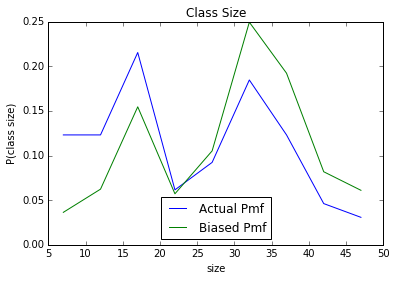

In [5]:
xs, class_ps = class_pmf.Render()
_, biased_ps = bias_class_pmf(class_pmf).Render()
f, ax = plt.subplots()
ax.set_xlabel("size")
ax.set_ylabel("P(class size)")
ax.set_title("Class Size")
first_line = ax.plot(xs, class_ps, label="Actual Pmf")
other_line = ax.plot(xs, biased_ps, label="Biased Pmf")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="best");

## Relay Race

In [6]:
import relay

In [7]:
results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
relay_pmf = Pmf.MakePmfFromList(speeds)

In [8]:
def bias_race_pmf(pmf, speed):
    return Pmf.MakePmfFromDict({v: p*abs(v-speed) for (v, p) in pmf.Items()})

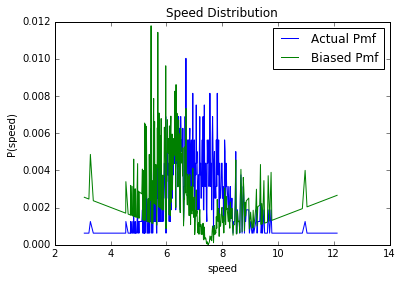

In [9]:
xs, relay_ps = relay_pmf.Render()
_, biased_ps = bias_race_pmf(relay_pmf, 7.5).Render()
f, ax = plt.subplots()
ax.set_xlabel("speed")
ax.set_ylabel("P(speed)")
ax.set_title("Speed Distribution")
first_line = ax.plot(xs, relay_ps, label="Actual Pmf")
other_line = ax.plot(xs, biased_ps, label="Biased Pmf")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="best");

## Percentile

In [10]:
def percentile_rank(scores, your_score):
    count = len([s for s in scores if s <= your_score])
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [11]:
scores = [55, 66, 77, 88, 99]
your_score = 88

In [12]:
percentile_rank(scores, your_score)

80.0

In [13]:
def percentile(scores, percentile_rank):
    idx = int((percentile_rank * len(scores))/100)
    idx = 0 if not idx else idx - 1
    scores.sort()
    return scores[idx]

In [14]:
percentile(scores, 80)

88

## Relay CDF

In [15]:
import Cdf

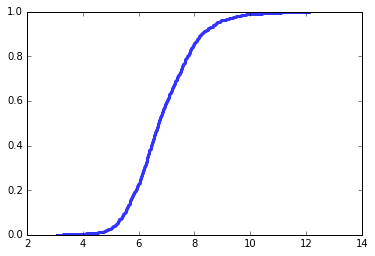

In [16]:
relay_cdf = Cdf.MakeCdfFromList(speeds)
myplot.Cdf(relay_cdf);

## Relay Percentile

In [17]:
my_result = results[93]
my_result

('97', '26/256', 'M4049', '42:48', '42:44', '6:53')

In [18]:
(my_speed,) = relay.GetSpeeds([my_result])
my_speed

8.716707021791768

My Percentile Rank

In [19]:
percentile_rank(speeds, my_speed)

94.17293233082707

### My Division Percentile Rank

In [20]:
div_speeds = relay.GetSpeeds([res for res in results if res[2] == 'M4049'])
my_rank = percentile_rank(div_speeds, my_speed)
my_rank

90.234375

In [21]:
old_speeds = relay.GetSpeeds([res for res in results if res[2] == 'M5059'])
my_old_speed = percentile(old_speeds, my_rank)
my_speed - my_old_speed

0.698889649854129

In [22]:
young_speeds = relay.GetSpeeds([res for res in results if res[2] == "F2039"])
my_young_speed = percentile(young_speeds, my_rank)
my_young_speed

7.67590618336887

## Random Numbers

In [23]:
from random import random

def sample(cdf, n):
    return [cdf.Value(random()) for x in range(n)]

### Birth Weight CDF

In [24]:
import survey
table = survey.Pregnancies()
table.ReadRecords()

In [25]:
def is_live_birth(record):
    return record.outcome == 1

weights = [r.totalwgt_oz for r in table.records if is_live_birth(r) and r.totalwgt_oz != "NA"]

In [26]:
weight_cdf = Cdf.MakeCdfFromList(weights)
sample_cdf = Cdf.MakeCdfFromList(sample(weight_cdf, 1000))

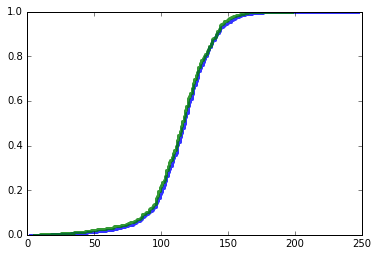

In [27]:
myplot.Cdfs([weight_cdf, sample_cdf])

## CDF Summary Stats

In [28]:
def median(cdf):
    return cdf.Value(0.5)

def interquartile(cdf):
    return cdf.Value(0.75) - cdf.Value(0.25)

In [29]:
median(weight_cdf)

118

In [30]:
interquartile(weight_cdf)

26

## Symmetric?

In [31]:
[weight_cdf.Value(x) for x in [0.25, 0.50, 0.75]]

[104, 118, 130]

Yes, I think the distribution is symmetric because the difference between the __median__ and the __25th percentile__ is almost the same as that between the __75th percentile__ and the __median__